In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
df=pd.read_csv("measurements.csv")

In [11]:
df.shape #388 rows, 12 columns

(388, 12)

In [4]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [6]:
df.info() #information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [8]:
df.isnull().sum()  #number of NAN

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [12]:
df["distance"]=df["distance"].str.replace(',', '.')
df["consume"]=df["consume"].str.replace(',', '.')
df["temp_inside"]=df["temp_inside"].str.replace(',', '.')
df["refill liters"]=df["refill liters"].str.replace(',', '.')

In [13]:
#note for the company that for the future they should always upload data in this format

In [16]:
df["distance"]=df["distance"].astype(float)
df["consume"]=df["consume"].astype(float)
df["temp_inside"]=df["temp_inside"].astype(float)
df["refill liters"]=df["refill liters"].astype(float) #again, this should be a default format

In [17]:
df["temp_inside"]=df["temp_inside"].fillna(np.mean(df["temp_inside"]))

In [18]:
df["temp_inside"].unique()

array([21.5       , 22.5       , 20.        , 21.92952128, 21.        ,
       20.5       , 23.        , 23.5       , 25.        , 24.        ,
       22.        , 19.        , 24.5       , 25.5       ])

In [20]:
df.isnull().sum() #temp inside fixed

distance           0
consume            0
speed              0
temp_inside        0
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

gas_type       E10       SP98
mean       4.93125   4.899123
median     4.80000   4.700000
amin       3.70000   3.300000
amax      10.80000  12.200000


Text(0.5, 1.0, 'gas_type & consume')

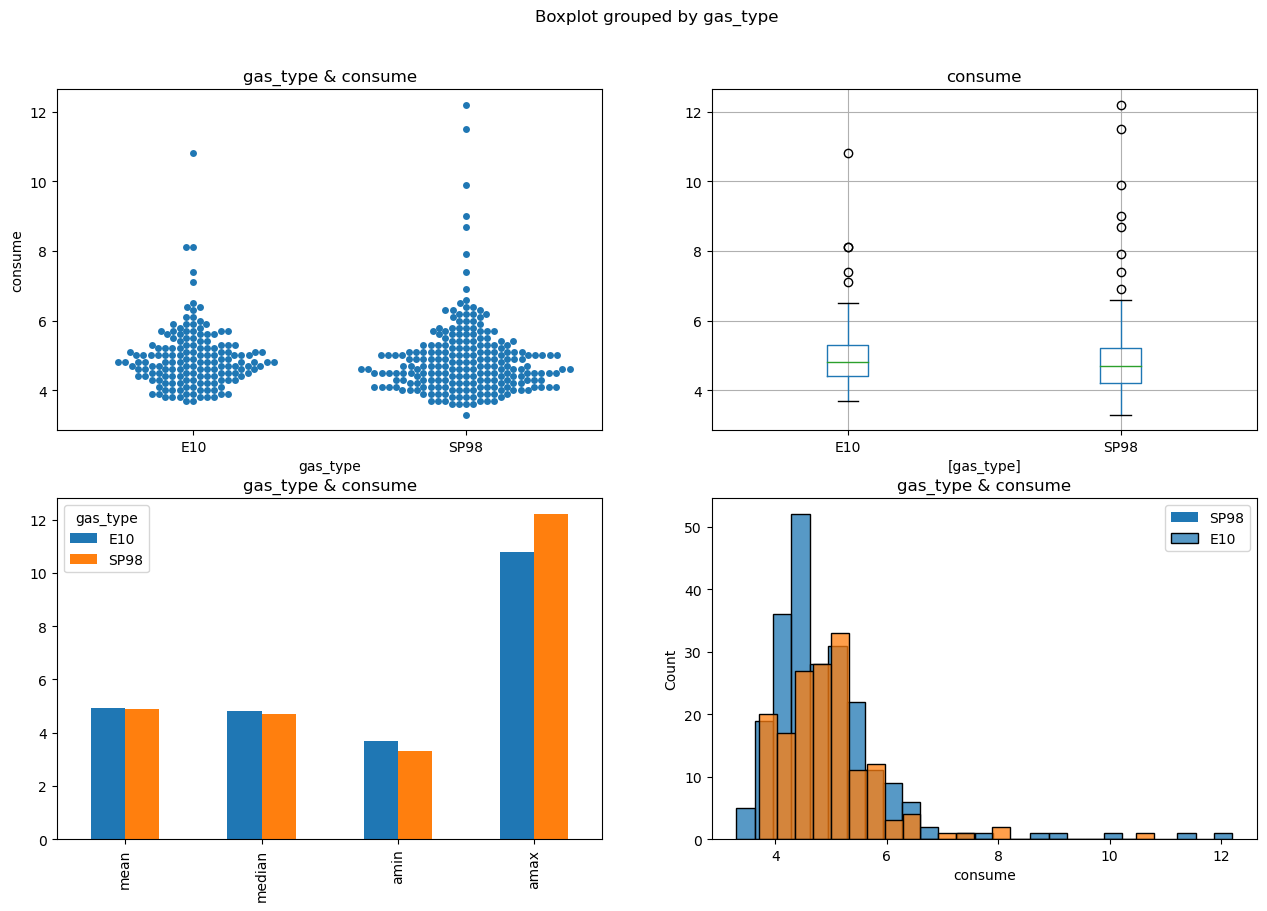

In [23]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.swarmplot(x=df['gas_type'],
              y=df['consume'],ax=ax1)
plt.title("gas_type & consume")

ax2=plt.subplot(2,2,2)
t=df[["consume","gas_type"]]
k2=t.boxplot(by="gas_type",ax=ax2)                                      

ax3=plt.subplot(2,2,3)
c=df.groupby("gas_type")["consume"].agg([np.mean,np.median,np.min,np.max])
df_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(df_T)
k1=df_T.plot(kind="bar",ax=ax3)
plt.title("gas_type & consume")

ax4=plt.subplot(2,2,4)
# t[t.gas_type=="SP98"].plot.kde(ax=ax4)
# t[t.gas_type=="E10"].plot.kde(ax=ax4)
sns.histplot(t[t.gas_type=="SP98"]["consume"],ax=ax4)
sns.histplot(t[t.gas_type=="E10"]["consume"],ax=ax4)
plt.legend(["SP98","E10"])
plt.title("gas_type & consume")

In [24]:
#E10 consumer more than SP98, but there are more outliers for SP98

AC             0          1
mean     4.88352   5.256667
median   4.70000   4.900000
amin     3.30000   4.000000
amax    11.50000  12.200000


Text(0.5, 1.0, 'AC & consume')

C:\Users\agata\anaconda3\Lib\site-packages\seaborn\categorical.py:3544: UserWarning: 9.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


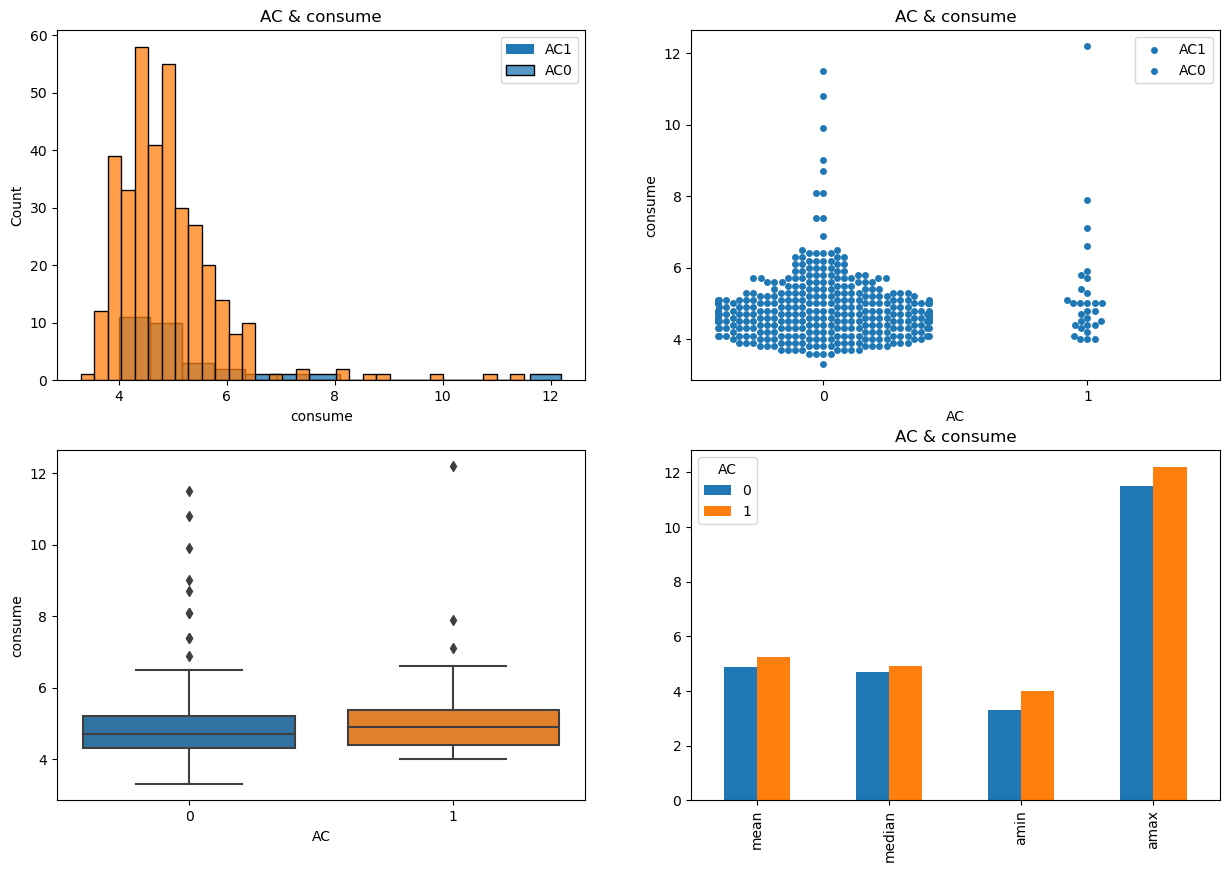

In [26]:
plt.figure(figsize=(15,10))
ax1=plt.subplot(2,2,1)
sns.histplot(df[df.AC==1].consume,ax=ax1)
sns.histplot(df[df.AC==0].consume,ax=ax1)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

ax2=plt.subplot(2,2,2)
sns.swarmplot(x=df.AC,y=df.consume,ax=ax2)
plt.legend(["AC1","AC0"])
plt.title("AC & consume")

ax3=plt.subplot(2,2,3)
sns.boxplot(x=df.AC,y=df.consume,ax=ax3)

ax4=plt.subplot(2,2,4)
c=df.groupby("AC")["consume"].agg([np.mean,np.median,np.min,np.max])
df_T = pd.DataFrame(c.values.T,columns=c.index,index=c.columns)
print(df_T)
k1=df_T.plot(kind="bar",ax=ax4)
plt.title("AC & consume")

In [28]:
#the car consumes more when AC is on, no matter the fuel

Text(0.5, 1.0, 'speed & consume')

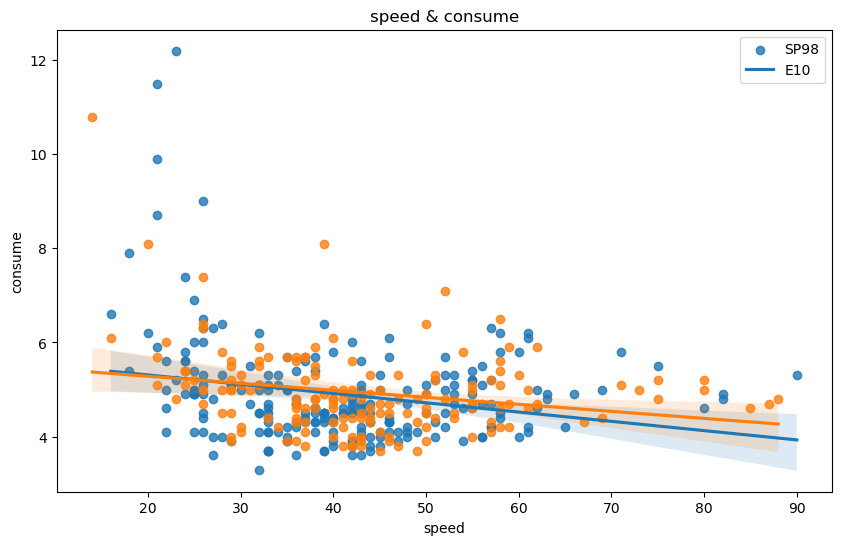

In [29]:
plt.figure(figsize=(10,6))
sns.regplot(x=df[df["gas_type"]=="SP98"]['speed'], y=df[df["gas_type"]=="SP98"]['consume'])
sns.regplot(x=df[df["gas_type"]=="E10"]['speed'], y=df[df["gas_type"]=="E10"]['consume'])
plt.legend(["SP98","E10"])
plt.xlabel("speed")
plt.ylabel("consume")
plt.title("speed & consume")

In [30]:
#when the speed is low, like in a traffic jam, the car consumes more, but it doesn't matter what kind of fuel

Text(0.5, 1.0, '1/distance & consume')

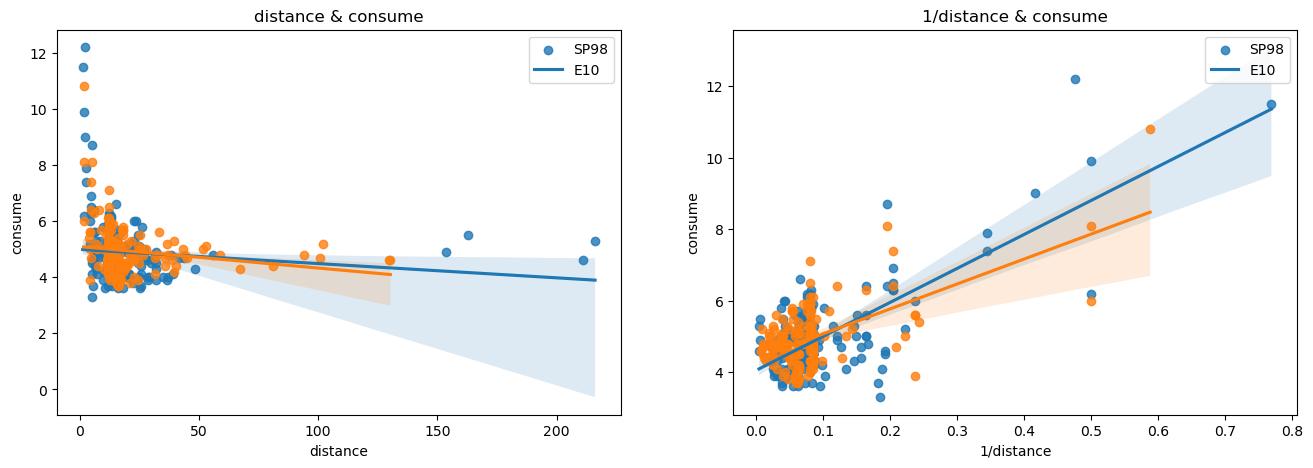

In [31]:
#since it's a car-sharing company, the cars usually go short distances
plt.figure(figsize=(16,5))
ax1=plt.subplot(1,2,1)

sns.regplot(x=df[df["gas_type"]=="SP98"]['distance'], y=df[df["gas_type"]=="SP98"]['consume'],ax=ax1)
sns.regplot(x=df[df["gas_type"]=="E10"]['distance'], y=df[df["gas_type"]=="E10"]['consume'],ax=ax1)
plt.legend(["SP98","E10"])
plt.xlabel("distance")
plt.ylabel("consume")
plt.title("distance & consume")

ax2=plt.subplot(1,2,2)
sns.regplot(x=1/df[df["gas_type"]=="SP98"]['distance'], y=df[df["gas_type"]=="SP98"]['consume'],ax=ax2)
sns.regplot(x=1/df[df["gas_type"]=="E10"]['distance'], y=df[df["gas_type"]=="E10"]['consume'],ax=ax2)
plt.legend(["SP98","E10"])
plt.xlabel("1/distance")
plt.ylabel("consume")
plt.title("1/distance & consume")

In [32]:
#there is no difference between both fuels